In [181]:
# import libraries

import pandas as pd
import numpy as np
import os
from datetime import date 
import hvplot
from dateutil import parser, tz
from sklearn.linear_model import Ridge




In [182]:
weather = pd.read_csv("San_Juan_weather.csv")

weather_df = pd.DataFrame(weather)

In [183]:
weather_df

,dt,dt_iso,timezone,city_name,lat,lon,temp,visibility,dew_point,feels_like,...,wind_gust,rain_1h,rain_3h,snow_1h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,283996800,1979-01-01 00:00:00 +0000 UTC,-14400,San Juan,18.467059,-66.118459,75.20,10000.0,70.03,76.37,...,NaN,NaN,NaN,NaN,NaN,40,802,Clouds,scattered clouds,03n
1,284000400,1979-01-01 01:00:00 +0000 UTC,-14400,San Juan,18.467059,-66.118459,74.62,NaN,70.83,75.92,...,NaN,NaN,NaN,NaN,NaN,35,802,Clouds,scattered clouds,03n
2,284004000,1979-01-01 02:00:00 +0000 UTC,-14400,San Juan,18.467059,-66.118459,74.39,NaN,70.93,75.70,...,NaN,NaN,NaN,NaN,NaN,52,803,Clouds,broken clouds,04n
3,284007600,1979-01-01 03:00:00 +0000 UTC,-14400,San Juan,18.467059,-66.118459,72.50,10000.0,68.41,73.54,...,22.82,NaN,NaN,NaN,NaN,40,802,Clouds,scattered clouds,03n
4,284011200,1979-01-01 04:00:00 +0000 UTC,-14400,San Juan,18.467059,-66.118459,72.19,10000.0,68.11,73.20,...,NaN,NaN,NaN,NaN,NaN,75,803,Clouds,broken clouds,04n
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390343,1672513200,2022-12-31 19:00:00 +0000 UTC,-14400,San Juan,18.467059,-66.118459,81.75,10000.0,71.83,86.40,...,NaN,NaN,NaN,NaN,NaN,40,802,Clouds,scattered clouds,03d
390344,1672516800,2022-12-31 20:00:00 +0000 UTC,-14400,San Juan,18.467059,-66.118459,81.57,10000.0,72.48,86.45,...,NaN,NaN,NaN,NaN,NaN,40,802,Clouds,scattered clouds,03d
390345,1672520400,2022-12-31 21:00:00 +0000 UTC,-14400,San Juan,18.467059,-66.118459,79.63,10000.0,71.78,79.63,...,NaN,NaN,NaN,NaN,NaN,40,802,Clouds,scattered clouds,03d
390346,1672524000,2022-12-31 22:00:00 +0000 UTC,-14400,San Juan,18.467059,-66.118459,78.33,10000.0,71.28,79.57,...,NaN,NaN,NaN,NaN,NaN,40,802,Clouds,scattered clouds,03n


In [184]:
null_pct = weather_df.apply(pd.isnull).sum()/weather_df.shape[0]
null_pct

dt                     0.000000
dt_iso                 0.000000
timezone               0.000000
city_name              0.000000
lat                    0.000000
lon                    0.000000
temp                   0.000000
visibility             0.143800
dew_point              0.000000
feels_like             0.000000
temp_min               0.000000
temp_max               0.000000
pressure               0.000000
sea_level              1.000000
grnd_level             1.000000
humidity               0.000000
wind_speed             0.000000
wind_deg               0.000000
wind_gust              0.908274
rain_1h                0.796459
rain_3h                1.000000
snow_1h                1.000000
snow_3h                1.000000
clouds_all             0.000000
weather_id             0.000000
weather_main           0.000000
weather_description    0.000000
weather_icon           0.000000
dtype: float64

In [185]:
valid_columns = weather_df.columns[null_pct < .05]


In [186]:
valid_columns


Index(['dt', 'dt_iso', 'timezone', 'city_name', 'lat', 'lon', 'temp',
       'dew_point', 'feels_like', 'temp_min', 'temp_max', 'pressure',
       'humidity', 'wind_speed', 'wind_deg', 'clouds_all', 'weather_id',
       'weather_main', 'weather_description', 'weather_icon'],
      dtype='object')

In [187]:
weather_df = weather_df[valid_columns].copy()


In [188]:
weather_df.columns = weather_df.columns.str.lower()


In [189]:
weather_df

,dt,dt_iso,timezone,city_name,lat,lon,temp,dew_point,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,283996800,1979-01-01 00:00:00 +0000 UTC,-14400,San Juan,18.467059,-66.118459,75.20,70.03,76.37,73.63,79.25,1018,84,9.17,50,40,802,Clouds,scattered clouds,03n
1,284000400,1979-01-01 01:00:00 +0000 UTC,-14400,San Juan,18.467059,-66.118459,74.62,70.83,75.92,73.20,78.42,1018,88,7.07,50,35,802,Clouds,scattered clouds,03n
2,284004000,1979-01-01 02:00:00 +0000 UTC,-14400,San Juan,18.467059,-66.118459,74.39,70.93,75.70,72.93,78.30,1018,89,7.11,45,52,803,Clouds,broken clouds,04n
3,284007600,1979-01-01 03:00:00 +0000 UTC,-14400,San Juan,18.467059,-66.118459,72.50,68.41,73.54,70.92,75.61,1018,87,13.65,70,40,802,Clouds,scattered clouds,03n
4,284011200,1979-01-01 04:00:00 +0000 UTC,-14400,San Juan,18.467059,-66.118459,72.19,68.11,73.20,70.48,75.16,1018,87,6.71,80,75,803,Clouds,broken clouds,04n
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390343,1672513200,2022-12-31 19:00:00 +0000 UTC,-14400,San Juan,18.467059,-66.118459,81.75,71.83,86.40,79.38,84.90,1017,72,16.11,80,40,802,Clouds,scattered clouds,03d
390344,1672516800,2022-12-31 20:00:00 +0000 UTC,-14400,San Juan,18.467059,-66.118459,81.57,72.48,86.45,79.38,84.45,1017,74,16.11,80,40,802,Clouds,scattered clouds,03d
390345,1672520400,2022-12-31 21:00:00 +0000 UTC,-14400,San Juan,18.467059,-66.118459,79.63,71.78,79.63,77.36,82.45,1018,77,13.80,70,40,802,Clouds,scattered clouds,03d
390346,1672524000,2022-12-31 22:00:00 +0000 UTC,-14400,San Juan,18.467059,-66.118459,78.33,71.28,79.57,76.37,79.90,1018,79,9.22,70,40,802,Clouds,scattered clouds,03n


In [190]:
weather_df.drop(['dt', 'city_name', 'lat', 'lon',
       'dew_point', 'feels_like', 'temp_min', 'temp_max', 'pressure',
       'humidity', 'clouds_all', 'weather_id',
       'weather_main', 'weather_description', 'weather_icon'], axis=1, inplace=True)

In [191]:
weather_df

,dt_iso,timezone,temp,wind_speed,wind_deg
0,1979-01-01 00:00:00 +0000 UTC,-14400,75.20,9.17,50
1,1979-01-01 01:00:00 +0000 UTC,-14400,74.62,7.07,50
2,1979-01-01 02:00:00 +0000 UTC,-14400,74.39,7.11,45
3,1979-01-01 03:00:00 +0000 UTC,-14400,72.50,13.65,70
4,1979-01-01 04:00:00 +0000 UTC,-14400,72.19,6.71,80
...,...,...,...,...,...
390343,2022-12-31 19:00:00 +0000 UTC,-14400,81.75,16.11,80
390344,2022-12-31 20:00:00 +0000 UTC,-14400,81.57,16.11,80
390345,2022-12-31 21:00:00 +0000 UTC,-14400,79.63,13.80,70
390346,2022-12-31 22:00:00 +0000 UTC,-14400,78.33,9.22,70


In [192]:
weather_df = weather_df.ffill()


In [193]:
weather_df.apply(pd.isnull).sum()


dt_iso        0
timezone      0
temp          0
wind_speed    0
wind_deg      0
dtype: int64

In [194]:
weather_df.apply(lambda x: (x == 9999).sum())


dt_iso        0
timezone      0
temp          0
wind_speed    0
wind_deg      0
dtype: int64

In [195]:
weather.dtypes


dt                       int64
dt_iso                  object
timezone                 int64
city_name               object
lat                    float64
lon                    float64
temp                   float64
visibility             float64
dew_point              float64
feels_like             float64
temp_min               float64
temp_max               float64
pressure                 int64
sea_level              float64
grnd_level             float64
humidity                 int64
wind_speed             float64
wind_deg                 int64
wind_gust              float64
rain_1h                float64
rain_3h                float64
snow_1h                float64
snow_3h                float64
clouds_all               int64
weather_id               int64
weather_main            object
weather_description     object
weather_icon            object
dtype: object

In [196]:
weather_df.index


RangeIndex(start=0, stop=390348, step=1)

In [197]:
weather_df

,dt_iso,timezone,temp,wind_speed,wind_deg
0,1979-01-01 00:00:00 +0000 UTC,-14400,75.20,9.17,50
1,1979-01-01 01:00:00 +0000 UTC,-14400,74.62,7.07,50
2,1979-01-01 02:00:00 +0000 UTC,-14400,74.39,7.11,45
3,1979-01-01 03:00:00 +0000 UTC,-14400,72.50,13.65,70
4,1979-01-01 04:00:00 +0000 UTC,-14400,72.19,6.71,80
...,...,...,...,...,...
390343,2022-12-31 19:00:00 +0000 UTC,-14400,81.75,16.11,80
390344,2022-12-31 20:00:00 +0000 UTC,-14400,81.57,16.11,80
390345,2022-12-31 21:00:00 +0000 UTC,-14400,79.63,13.80,70
390346,2022-12-31 22:00:00 +0000 UTC,-14400,78.33,9.22,70


In [198]:
#weather_df['dt_iso'] = str(weather_df['dt_iso'])

In [199]:
weather_df['dt_iso']

0         1979-01-01 00:00:00 +0000 UTC
1         1979-01-01 01:00:00 +0000 UTC
2         1979-01-01 02:00:00 +0000 UTC
3         1979-01-01 03:00:00 +0000 UTC
4         1979-01-01 04:00:00 +0000 UTC
                      ...              
390343    2022-12-31 19:00:00 +0000 UTC
390344    2022-12-31 20:00:00 +0000 UTC
390345    2022-12-31 21:00:00 +0000 UTC
390346    2022-12-31 22:00:00 +0000 UTC
390347    2022-12-31 23:00:00 +0000 UTC
Name: dt_iso, Length: 390348, dtype: object

In [200]:
# replace the string in the 'date' column
weather_df['dt_iso'] = weather_df['dt_iso'].str.replace('\+0000 UTC', '-04:00')

weather_df

C:\Users\marcl\AppData\Local\Temp\ipykernel_8064\3457383083.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  weather_df['dt_iso'] = weather_df['dt_iso'].str.replace('\+0000 UTC', '-04:00')


,dt_iso,timezone,temp,wind_speed,wind_deg
0,1979-01-01 00:00:00 -04:00,-14400,75.20,9.17,50
1,1979-01-01 01:00:00 -04:00,-14400,74.62,7.07,50
2,1979-01-01 02:00:00 -04:00,-14400,74.39,7.11,45
3,1979-01-01 03:00:00 -04:00,-14400,72.50,13.65,70
4,1979-01-01 04:00:00 -04:00,-14400,72.19,6.71,80
...,...,...,...,...,...
390343,2022-12-31 19:00:00 -04:00,-14400,81.75,16.11,80
390344,2022-12-31 20:00:00 -04:00,-14400,81.57,16.11,80
390345,2022-12-31 21:00:00 -04:00,-14400,79.63,13.80,70
390346,2022-12-31 22:00:00 -04:00,-14400,78.33,9.22,70


In [201]:
# convert the date string to pandas datetime format
#weather_df['dt_iso'] = pd.to_datetime(weather_df['dt_iso'], format='%Y-%m-%d %H:%M:%S %Z')

In [202]:
# Convert the 'date' column to a datetime format
#weather_df['date'] = weather_df['dt_iso'].apply(lambda x: parser.parse(x[:26]).replace(tzinfo=tz.tzutc()))



In [203]:
weather_df.set_index('dt_iso', inplace=True)


In [204]:
weather_df

,timezone,temp,wind_speed,wind_deg
dt_iso,,,,
1979-01-01 00:00:00 -04:00,-14400,75.20,9.17,50
1979-01-01 01:00:00 -04:00,-14400,74.62,7.07,50
1979-01-01 02:00:00 -04:00,-14400,74.39,7.11,45
1979-01-01 03:00:00 -04:00,-14400,72.50,13.65,70
1979-01-01 04:00:00 -04:00,-14400,72.19,6.71,80
...,...,...,...,...
2022-12-31 19:00:00 -04:00,-14400,81.75,16.11,80
2022-12-31 20:00:00 -04:00,-14400,81.57,16.11,80
2022-12-31 21:00:00 -04:00,-14400,79.63,13.80,70


In [205]:
weather_df.index = pd.to_datetime(weather_df.index)

weather_df

,timezone,temp,wind_speed,wind_deg
dt_iso,,,,
1979-01-01 00:00:00-04:00,-14400,75.20,9.17,50
1979-01-01 01:00:00-04:00,-14400,74.62,7.07,50
1979-01-01 02:00:00-04:00,-14400,74.39,7.11,45
1979-01-01 03:00:00-04:00,-14400,72.50,13.65,70
1979-01-01 04:00:00-04:00,-14400,72.19,6.71,80
...,...,...,...,...
2022-12-31 19:00:00-04:00,-14400,81.75,16.11,80
2022-12-31 20:00:00-04:00,-14400,81.57,16.11,80
2022-12-31 21:00:00-04:00,-14400,79.63,13.80,70


In [206]:
#weather_df.index.year.value_counts().sort_index()


In [207]:
# convert DatetimeIndex object to Series with datetime column
#date_series = pd.Series(weather_df.index)

# extract year from datetime column
#year_series = date_series.dt.year

#year_series

In [208]:
# reset the index
#weather_df.reset_index(drop=True, inplace=True)

#weather_df

In [209]:
# group values by year and calculate mean
#mean_by_year = weather_df.groupby(year_series)['wind_speed'].mean()

#mean_by_year.head()

<AxesSubplot:xlabel='dt_iso'>

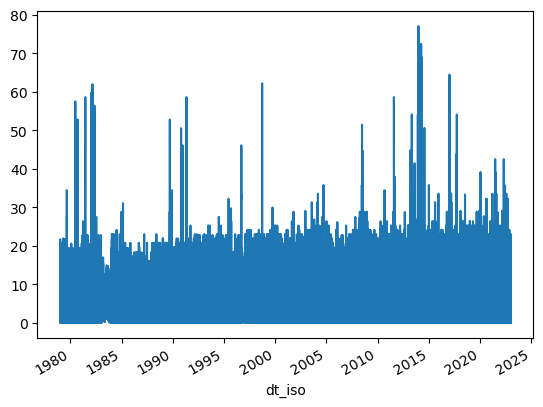

In [210]:
weather_df["wind_speed"].plot()